In [11]:
#Import Libraries
from generate_data_class import GenerateData
import genetic_algo_gs as gag
import kmeans
import numpy
import itertools

Step 1: Generate sample data

In [12]:
#Inputs
kNo = 3

#Generate Data
gy = GenerateData(kNo)
rawData = gy.raw_data()

In [13]:
def kmean_data(data):
    l = []
    for el in data:
        l2 = []
        l2.append(el[0][0])
        l2.append(el[1][0])
        l.append(numpy.array(l2))

    return numpy.array(l)

Step 2: Perform K-Means

c:\Users\paras\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paras\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Algorithm converged after 9 iterations.
Fitness value of K-Means output is: 0.00004257


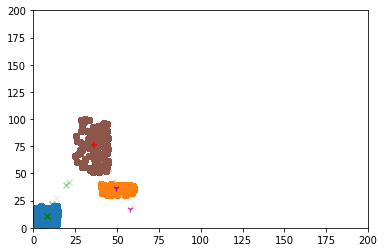

In [14]:
model = kmeans.KMeans(kNo)
data1 = kmean_data(rawData)
model.fit(data1,False,True)
ml = model.to__solution()
print(f'Fitness value of K-Means output is: {gag.fitness_func(numpy.array([ml]))[0]:0.8f}')

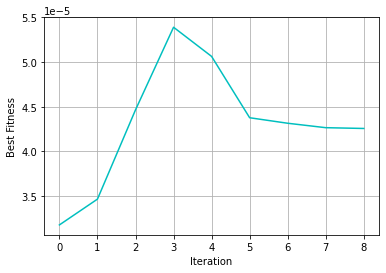

In [15]:
ko = model.evolution
lp = []
kmean_fitness_list = []
ti = []
for el in ko: 
    yo = []   
    for subel in el:
        yo.append(subel[0])
        yo.append(subel[1])
    ti.append(numpy.array(yo))
ti = numpy.array(ti)

io = gag.fitness_func(ti)
gag.display_plot(io.tolist())

Step 3: Get best centroid list from K-Means and feed to GA

In [16]:
data_for_GA = []
for ty in model.evolution[-1]:
    data_for_GA.append(ty[0])
    data_for_GA.append(ty[1])
print(data_for_GA)

[36.337590909064645, 76.15294357292696, 7.947780615355857, 11.216794989805031, 49.24471052184548, 37.001888561358044]


Step 4: Calculate fitness of kmeans solution and run GA Algorithm

In [17]:
initial_centroids = gag.init_cluster_center(kNo,data_for_GA)
fit_func = gag.fitness_func(initial_centroids)

In [21]:
_, plot_result, _, _,centroidList = gag.GeneticAlgorithm(gag.fitness_func,kNo,100,dataCen=data_for_GA)

Generation #-1   |fitness: 0.0000426 |Centroid = [36.33759091 76.15294357  7.94778062 11.21679499 49.24471052 37.00188856]
Generation #0   |fitness: 0.0000427 |Centroid = [36.33759091 76.15294357  8.10673623 11.44113089 50.22960473 37.74192633]
Generation #1   |fitness: 0.0000432 |Centroid = [38.06434273 77.67600244  7.94778062 12.21679499 50.24471052 38.4819641 ]
Generation #2   |fitness: 0.0000442 |Centroid = [39.06434273 77.15294357  7.94778062 13.21679499 49.24471052 37.00188856]
Generation #3   |fitness: 0.0000452 |Centroid = [39.06434273 76.15294357  8.94778062 13.21679499 51.21449894 38.00188856]
Generation #4   |fitness: 0.0000447 |Centroid = [39.06434273 77.15294357  8.94778062 13.21679499 49.24471052 37.00188856]
Generation #5   |fitness: 0.0000448 |Centroid = [39.06434273 77.15294357  8.94778062 14.21679499 51.21449894 37.00188856]
Generation #6   |fitness: 0.0000447 |Centroid = [39.06434273 76.15294357  7.94778062 13.21679499 51.73715763 37.00188856]
Generation #7   |fitnes

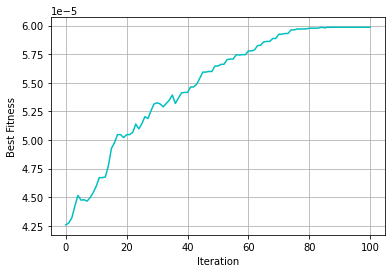

In [22]:
gag.display_plot(plot_result)

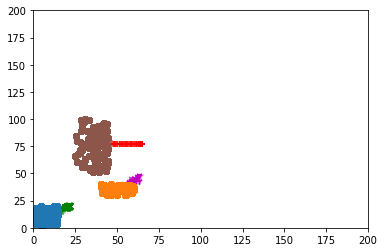

In [23]:
alphas = itertools.cycle(list(numpy.arange(0.1,1,1/100)))
for e in centroidList:
    kmeans.plot_resV3(data1,e,alpha = next(alphas),marker="x",nb_clusters=kNo)